In [28]:
import pandas as pd
melb_df = pd.read_csv('/Users/jurain/Downloads/melb_data_fe.csv')
melb_df.head(5)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [29]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

In [30]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst = True)
quarters = melb_df['Date'].dt.quarter
quarters.value_counts()

3    4873
2    4359
4    2329
1    2019
Name: Date, dtype: int64

In [33]:
columns_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car']
min_unique = 150
for columns in melb_df.columns:
    if melb_df[columns].nunique() < min_unique and columns not in columns_to_exclude:
        melb_df[columns] = melb_df[columns].astype('category')
display(melb_df.info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

In [47]:
mask1 = melb_df['Type'] == 'townhouse'
mask2 = melb_df['Rooms'] > 2
melb_df_filtered = melb_df[(mask1&mask2)].sort_values(by = ['Rooms', 'MeanRoomsSquare'], ascending = [True, False], ignore_index = True).loc[18, 'Price']
print(melb_df_filtered)


1300000.0


In [48]:
melb_df.groupby(by='Type').mean()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


In [51]:
melb_df.groupby(by = 'Rooms')['Price'].mean().sort_values(ascending = False)

Rooms
7     1.920700e+06
5     1.870260e+06
6     1.849366e+06
8     1.602750e+06
4     1.445282e+06
3     1.076081e+06
10    9.000000e+05
2     7.750812e+05
1     4.338245e+05
Name: Price, dtype: float64

In [52]:
melb_df.groupby('Regionname')['Lattitude'].std().sort_values()

Regionname
Western Victoria              0.011579
Southern Metropolitan         0.043080
Eastern Metropolitan          0.047890
Northern Metropolitan         0.049639
Western Metropolitan          0.051251
South-Eastern Metropolitan    0.073411
Northern Victoria             0.084455
Eastern Victoria              0.147067
Name: Lattitude, dtype: float64

In [53]:
date1 = pd.to_datetime('2017-05-01')
date2 = pd.to_datetime('2017-09-01')
mask = (date1 <= melb_df['Date']) & (melb_df['Date']<= date2)
melb_df[mask].groupby('SellerG')['Price'].sum().sort_values(ascending=True)

SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
Bells              8656000.0
Alexkarbon        10985000.0
McDonald          14637500.0
Rendina           15422276.0
Nick              16890000.0
Douglas           18341000.0
Buckingham        19033000.0
C21               19515000.0
Eview             19791500.0
Collins           20217000.0
Philip            22051800.0
Chisholm          23225000.0
Williams          23297000.0
Love              23365500.0
Purplebricks      23401000.0
O'Brien           23855508.0
HAR               25568000.0
Village           26473000.0
RW                29261000.0
Raine             30687700.0
Stockdale         35409800.0
Sweeney           36882750.0
Gary              39138400.0
Hodges            43231000.0
YPA               46354350.0
Miles             47582000.0
Kay               48569500.0
RT                50498000.0
Brad              55955000.0
Jas   

In [54]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


In [55]:
pivot = melb_df.pivot_table(
    values='BuildingArea',
    index='Type',
    columns='Rooms',
    aggfunc='median',
    fill_value=0
)
display(pivot)

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126
townhouse,88.0,114,126,159.5,152,0,0.0,0,0
unit,69.5,110,126,126.0,0,171,0.0,126,0


In [56]:
pivot = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='mean',
)
max_unit_price = pivot['unit'].max()
print(pivot[pivot['unit'] == max_unit_price].index[0])

Nick


In [5]:
import pandas as pd
covid_data = pd.read_csv('/Users/jurain/Downloads/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [9]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
cov_data_min = covid_data['date'].min()
cov_data_max = covid_data['date'].max()
display(cov_data_min)
display(cov_data_max)

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

In [8]:
vaccinations_data = pd.read_csv('/Users/jurain/Downloads/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [10]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data)

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [15]:
vac_min = vaccinations_data['date'].min()
vac_max = vaccinations_data['date'].max()
display(vac_min)
display(vac_max)

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

In [21]:
covid_df = covid_data.merge(vaccinations_data, how = 'left', on = ['date','country'] )
display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)


7.19

In [25]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

AxesSubplot(0.125,0.125;0.775x0.755)


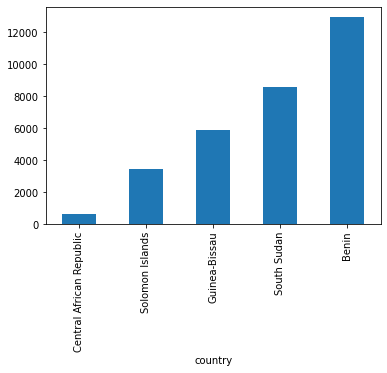

In [26]:
s_country = covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind = 'bar')
print(s_country)

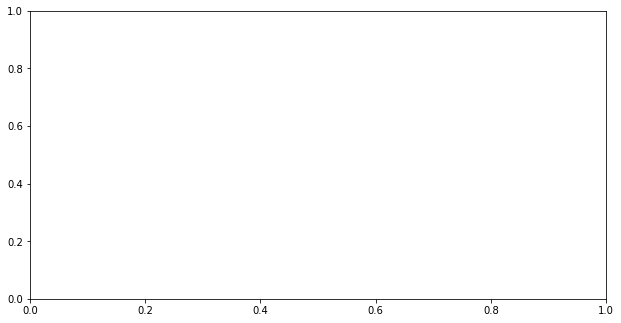

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

In [35]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.8.0


In [ ]:
import plotly.express as px



In [37]:
pip --version

pip 22.1.1 from /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pip (python 3.9)
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('/Users/jurain/Downloads/sber_data.csv')
sber_data.head()



,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [45]:
print(sber_data['sub_area'].nunique())

146


In [46]:
print(sber_data['price_doc'].max())

111111112


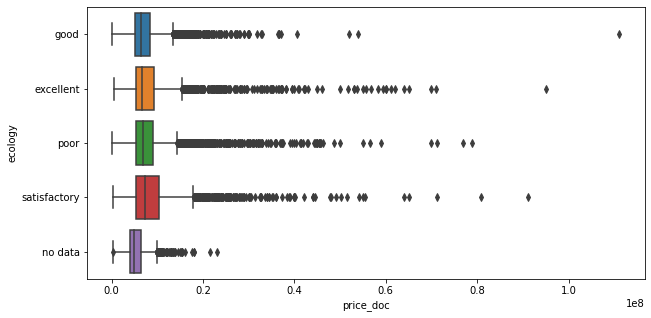

In [47]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=sber_data, x='price_doc', y='ecology');

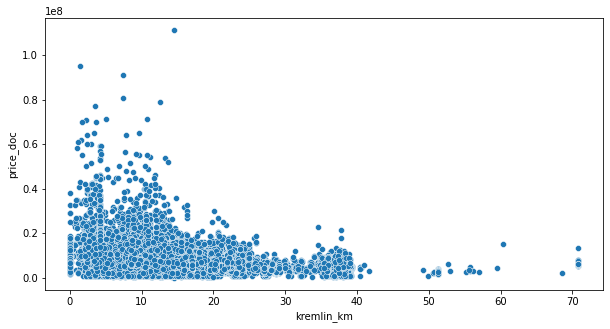

In [48]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(data=sber_data, y='price_doc', x='kremlin_km');

In [44]:
display(sber_data.tail())
display(sber_data.info())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

None

In [49]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

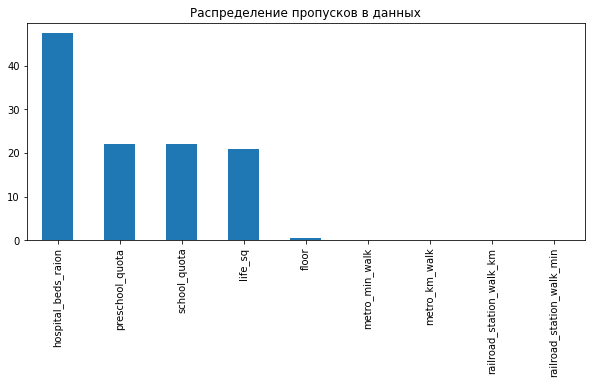

In [51]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

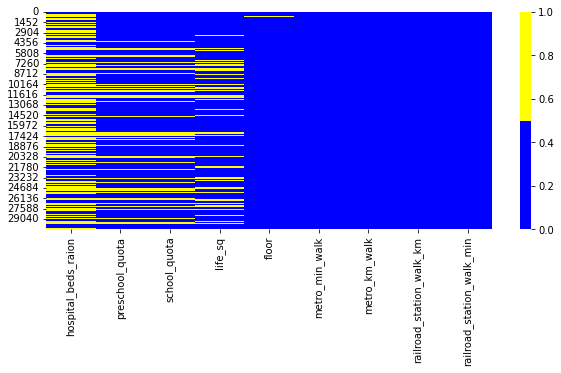

In [52]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)